# APRIORI 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from wordcloud import WordCloud
import networkx as nx

from  mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('MBA.csv', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(7501, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [7]:
data.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [8]:
data[0]

0              shrimp
1             burgers
2             chutney
3              turkey
4       mineral water
            ...      
7496           butter
7497          burgers
7498          chicken
7499         escalope
7500             eggs
Name: 0, Length: 7501, dtype: object

## EDA

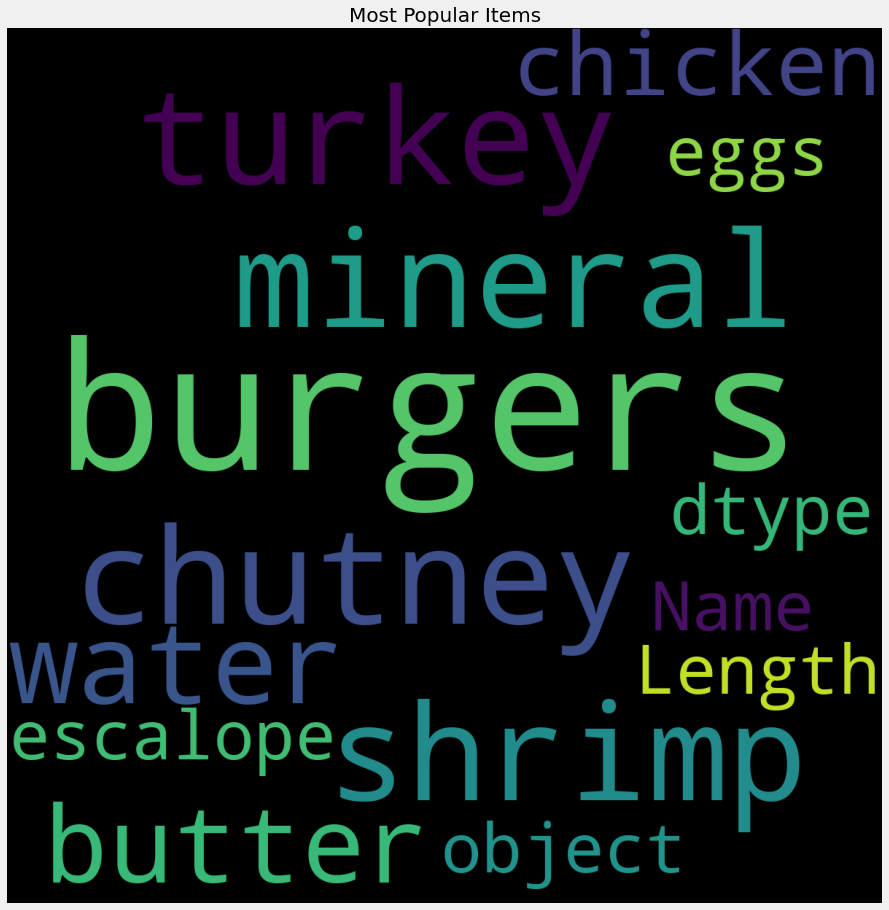

In [9]:
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(background_color= "black", width=1200, height=1200, max_words= 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items', fontsize=20)
plt.show()

In [10]:
data[0].value_counts()

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
                    ... 
cauliflower            1
ketchup                1
cream                  1
body spray             1
oatmeal                1
Name: 0, Length: 115, dtype: int64

## Looking at the freuency of most popular items

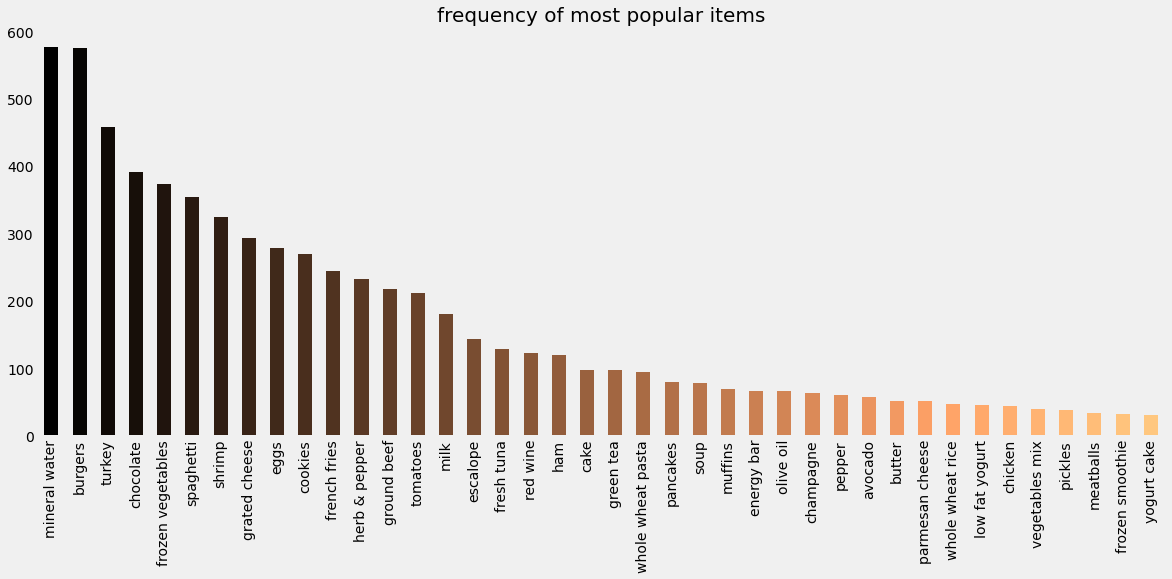

In [11]:
plt.rcParams['figure.figsize'] = (18,7)
color = plt.cm.copper(np.linspace(0,1,40))
data[0].value_counts().head(40).plot.bar(color=color)
plt.title('frequency of most popular items', fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [12]:
data[0].value_counts().head(50)

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
spaghetti            354
shrimp               325
grated cheese        293
eggs                 279
cookies              270
french fries         244
herb & pepper        232
ground beef          218
tomatoes             212
milk                 181
escalope             143
fresh tuna           129
red wine             123
ham                  120
cake                  98
green tea             97
whole wheat pasta     95
pancakes              80
soup                  78
muffins               69
energy bar            67
olive oil             67
champagne             64
pepper                61
avocado               57
butter                52
parmesan cheese       51
whole wheat rice      47
low fat yogurt        46
chicken               44
vegetables mix        39
pickles               38
meatballs             33
frozen smoothie       32
yogurt cake           31


In [13]:
y = data[0].value_counts().head(50).to_frame()
y

,0
mineral water,577
burgers,576
turkey,458
chocolate,391
frozen vegetables,373
spaghetti,354
shrimp,325
grated cheese,293
eggs,279
cookies,270


## Plotting a tree map

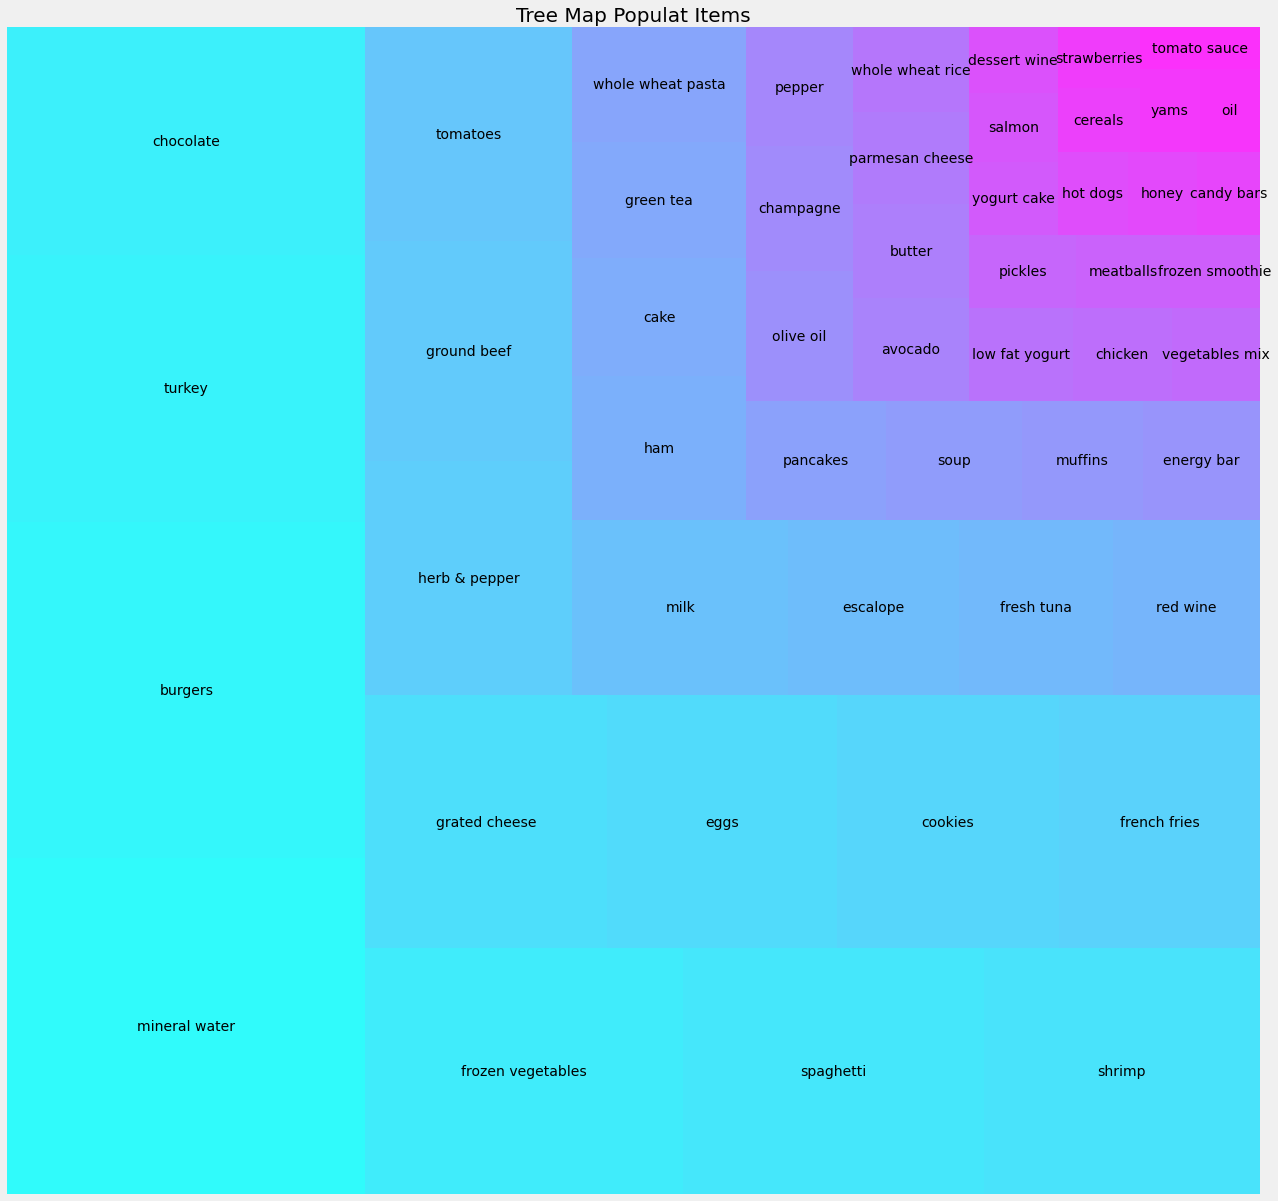

In [14]:
plt.rcParams['figure.figsize'] = (20,20)
color = plt.cm.cool(np.linspace(0,1,50))
squarify.plot(sizes=y.values, label= y.index, alpha=0.8, color=color)
plt.axis('off')
plt.title('Tree Map Populat Items', fontsize=20)
plt.show()

In [15]:
data['food'] = 'Food'
food = data.truncate(before=-1, after=15)

In [16]:
food

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,food
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil,Food
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food


In [17]:
food = nx.from_pandas_edgelist(food, source='food', target=0, edge_attr= True)

In [18]:
pos = nx.spring_layout(food)

In [19]:
pos

{'Food': array([ 0.00026874, -0.00428936]),
 'shrimp': array([0.12082353, 0.99334764]),
 'burgers': array([-0.74350063,  0.55726555]),
 'chutney': array([ 0.15096734, -0.90097201]),
 'turkey': array([-0.64940018, -0.19676636]),
 'mineral water': array([-0.31607155, -0.90244305]),
 'low fat yogurt': array([0.36919853, 0.61166607]),
 'whole wheat pasta': array([-1.        ,  0.10090734]),
 'soup': array([ 0.83961275, -0.36808143]),
 'frozen vegetables': array([0.944766  , 0.08242213]),
 'french fries': array([ 0.58921513, -0.75699853]),
 'eggs': array([-0.76072954, -0.64123686]),
 'cookies': array([0.82265946, 0.57861069]),
 'spaghetti': array([-0.36780959,  0.84656818])}

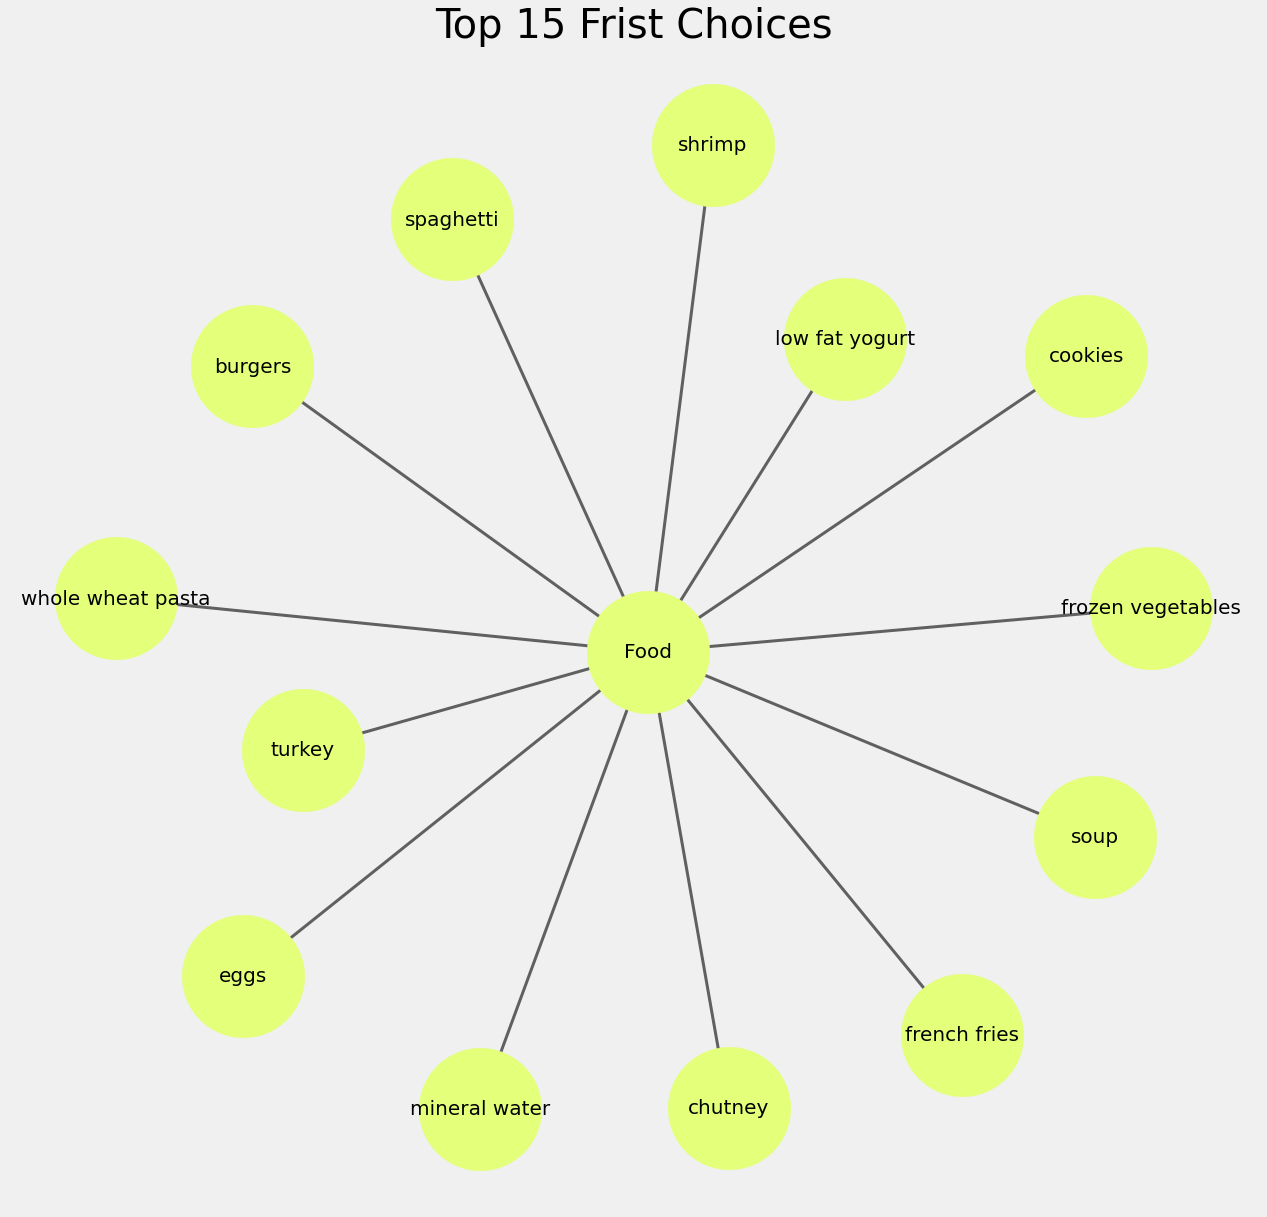

In [20]:
plt.rcParams['figure.figsize'] = (20,20)
color = plt.cm.Wistia(np.linspace(0,15,1))
nx.draw_networkx_nodes(food, pos, node_size= 15000, node_color=color)
nx.draw_networkx_edges(food, pos, width=3, alpha=0.6, edge_color= 'black')
nx.draw_networkx_labels(food, pos, font_size=20, font_family='sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Frist Choices', fontsize=40)
plt.show()

In [21]:
data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate (before = -1, after = 15)
secondchoice

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,food,secondchoice
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil,Food,Second Choice
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice


In [22]:
data['thirdchoice'] = 'Third Choice'
thirdchoice = data.truncate (before = -1, after = 10)
thirdchoice

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,food,secondchoice,thirdchoice
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil,Food,Second Choice,Third Choice
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice,Third Choice
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice,Third Choice
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice,Third Choice
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice,Third Choice
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice,Third Choice
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice,Third Choice
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice,Third Choice
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice,Third Choice
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice,Third Choice


## Data Preprocessing

In [23]:
transactions = []
for i in range(0,7501):
    transactions.append([str(data.values[i,j]) for j in range(0,20)])
    
print(transactions)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan

In [24]:
print('First Transaction: \n')
print(transactions[:1])
print('\n second Transaction: \n')
print(transactions[1:2])

First Transaction: 

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']]

 second Transaction: 

[['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']]


In [25]:
transactions = np.array(transactions)
print(transactions.shape)

(7501, 20)


In [26]:
transactions

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [27]:
encoder = TransactionEncoder()

data = encoder.fit_transform(transactions)

data = pd.DataFrame(data, columns= encoder.columns_)

data.head(10)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Columns: 121 entries,  asparagus to zucchini
dtypes: bool(121)
memory usage: 886.5 KB


In [29]:
data.shape

(7501, 121)

## Modal Training

In [30]:
apriori(data, min_support=0.03, use_colnames= True)

,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
...,...,...
104,0.039195,"(ground beef, spaghetti, nan)"
105,0.047994,"(milk, nan, mineral water)"
106,0.035462,"(milk, spaghetti, nan)"
107,0.033729,"(nan, pancakes, mineral water)"


In [31]:
apriori(data, min_support=0.05, use_colnames=True)

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [32]:
frequnt_itemsets = apriori(data, min_support=0.05, use_colnames=True)
frequnt_itemsets['length'] = frequnt_itemsets['itemsets'].apply(lambda x: len(x))
frequnt_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


In [33]:
frequnt_itemsets.sort_values('support', ascending = False)

,support,itemsets,length
17,0.999867,(nan),1
16,0.238368,(mineral water),1
44,0.238235,"(nan, mineral water)",2
34,0.179709,"(eggs, nan)",2
6,0.179709,(eggs),1
50,0.174110,"(spaghetti, nan)",2
22,0.174110,(spaghetti),1
36,0.170911,"(french fries, nan)",2
8,0.170911,(french fries),1
3,0.163845,(chocolate),1


In [34]:
Asso_Rules = association_rules(frequnt_itemsets, metric= "lift", min_threshold=1)
Asso_Rules.sort_values('lift', ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
58,"(nan, mineral water)",(spaghetti),0.238235,0.174110,0.059725,0.250699,1.439890,0.018246,1.102215
59,(spaghetti),"(nan, mineral water)",0.174110,0.238235,0.059725,0.343032,1.439890,0.018246,1.159517
31,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
30,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
56,"(spaghetti, nan)",(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
...,...,...,...,...,...,...,...,...,...
29,(nan),(milk),0.999867,0.129583,0.129583,0.129600,1.000133,0.000017,1.000020
5,(chicken),(nan),0.059992,0.999867,0.059992,1.000000,1.000133,0.000008,inf
1,(nan),(burgers),0.999867,0.087188,0.087188,0.087200,1.000133,0.000012,1.000013
32,(nan),(pancakes),0.999867,0.095054,0.095054,0.095067,1.000133,0.000013,1.000014


In [35]:
frequnt_itemsets[ (frequnt_itemsets['length'] == 2) &
                 (frequnt_itemsets['support'] >= 0.1)]

,support,itemsets,length
30,0.163845,"(nan, chocolate)",2
34,0.179709,"(eggs, nan)",2
36,0.170911,"(french fries, nan)",2
40,0.131982,"(green tea, nan)",2
43,0.129583,"(milk, nan)",2
44,0.238235,"(nan, mineral water)",2
50,0.174110,"(spaghetti, nan)",2


In [36]:
frequnt_itemsets[ (frequnt_itemsets['length'] == 1) &
                 (frequnt_itemsets['support'] >= 0.1)]

,support,itemsets,length
3,0.163845,(chocolate),1
6,0.179709,(eggs),1
8,0.170911,(french fries),1
12,0.132116,(green tea),1
15,0.129583,(milk),1
16,0.238368,(mineral water),1
17,0.999867,(nan),1
22,0.174110,(spaghetti),1


In [37]:
frequnt_itemsets[ frequnt_itemsets['itemsets'] == {'eggs', 'minera water'}]

,support,itemsets,length


In [38]:
frequnt_itemsets[ frequnt_itemsets['itemsets'] == {'chocolate'}]

,support,itemsets,length
3,0.163845,(chocolate),1
